## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part1-2: Finish the Solution Parse Part of Edit-Distance

### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning  ---> reading
+ 黑客与画家 --->  看过
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: 遇到有重复子问题组成的复杂问题，可以采用动态规划，本质为不断查表过程，节省时间，提高效率，搜索包括深度搜索，广度搜索，这个问题一般不是由一系列的子问题组成的。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:能用动态规划解决的问题没有必要使用机器学习方法，动态规划利用子问题求解，得到的答案是高度正确的，机器学习方法用于很难获得right的回答，通过学习帮助得到一个近似正确的解

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:论文查重， 旅行商问题，字符串搜索，手写字符识别，etc

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: DNA检测，错别字修改，论文查重，搜狗拼音， 机器翻译与原文比对相似度，etc

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

+  不断递归的查找子问题与复杂问题之间的联系
+  过程存储子问题的解决方案
+  解决同样的子问题通过不断查表得出结果

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:空间换时间，如果子问题很多，查表速率很慢，对于高维度的问题不能很好解决

## Part 4 Preparation of Project-01  

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [1]:
import random
import matplotlib.pylab as plt

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

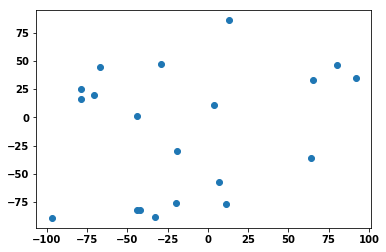

In [3]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [7]:
chosen_p = (5, 10)

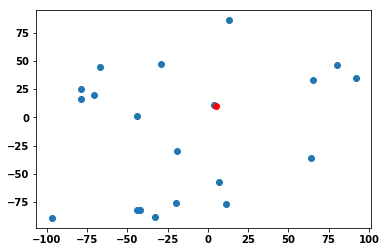

In [8]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

In [9]:
coord_point = []
points = {}
points[0] = chosen_p
for i in range(len(latitudes)):
    points[i+1] = (latitudes[i], longitude[i])
points

{0: (5, 10),
 1: (64, -36),
 2: (-19, -30),
 3: (11, -77),
 4: (-79, 25),
 5: (13, 86),
 6: (92, 35),
 7: (-79, 16),
 8: (-67, 45),
 9: (-71, 20),
 10: (65, 33),
 11: (-44, -82),
 12: (80, 46),
 13: (-44, 1),
 14: (-33, -88),
 15: (-29, 47),
 16: (4, 11),
 17: (-20, -76),
 18: (7, -57),
 19: (-97, -89),
 20: (-42, -82)}

> 想法是：从初始点开始，从剩余点找距离最短的点，再从找到的点开始找距离最小的点，也就是不断找在当前剩余点中距离最小的点

In [10]:
import math

In [14]:
def get_distance(point1, point2):
    return math.sqrt(pow(point1[0]-point2[0],2)+ pow(point1[1]-point2[1],2))

In [38]:
distance_map = {}
for bh, point in points.items():
    point_temp = {}
    for bg_in, point_in in points.items():
        if bh == bg_in: continue
        if bg_in in distance_map:
            point_temp[(bg_in,bh)] = distance_map[bg_in][(bh, bg_in)]
        else:
            point_temp[(bg_in,bh)] = get_distance(point, point_in)
    distance_map[bh] = point_temp   

In [69]:
sorted_map = []
for i,points_temp in distance_map.items():
    sorted_map.append(sorted(points_temp.items(), key = lambda item:item[1]))

In [70]:
sorted_map[0]

[((16, 0), 1.4142135623730951),
 ((2, 0), 46.647615158762406),
 ((13, 0), 49.8196748283246),
 ((15, 0), 50.24937810560445),
 ((10, 0), 64.25729530566937),
 ((18, 0), 67.02984409947557),
 ((1, 0), 74.81310045707235),
 ((5, 0), 76.4198926981712),
 ((9, 0), 76.6550715869472),
 ((8, 0), 80.05623023850174),
 ((12, 0), 83.19254774317228),
 ((7, 0), 84.2140130857092),
 ((4, 0), 85.32877591996736),
 ((3, 0), 87.20665112249179),
 ((17, 0), 89.56003573022959),
 ((6, 0), 90.52071586106685),
 ((20, 0), 103.31021246711285),
 ((11, 0), 104.23531071570709),
 ((14, 0), 105.1094667477673),
 ((19, 0), 142.1442928857856)]

In [81]:
sorted_map[0][0][0][0]

16

In [91]:
path = [] # 记录的是点的编号
ans = 0
while True:
    if len(path) == len(points): break
    if len(path) == 0:  # 假设起始点为点0
        path.append(0)
    frontitor = path[-1]
    for i in sorted_map[frontitor]:
        if i[0][0] in path: continue
        path.append(i[0][0])
        print('{}->{}:{}'.format(frontitor,i[0][0],i[1]))
        ans += i[1]
        break

0->16:1.4142135623730951
16->2:47.01063709417264
2->18:37.48332962798263
18->3:20.396078054371138
3->17:31.016124838541646
17->14:17.69180601295413
14->20:10.816653826391969
20->11:2.0
11->19:53.46026561849464
19->13:104.44615837837216
13->9:33.015148038438355
9->7:8.94427190999916
7->4:9.0
4->8:23.323807579381203
8->15:38.05259518088089
15->5:57.3149195236284
5->10:74.24957912338628
10->12:19.849433241279208
12->6:16.278820596099706
6->1:76.32168761236873


In [92]:
path

[0, 16, 2, 18, 3, 17, 14, 20, 11, 19, 13, 9, 7, 4, 8, 15, 5, 10, 12, 6, 1]

In [93]:
[points[item] for item in path]

[(5, 10),
 (4, 11),
 (-19, -30),
 (7, -57),
 (11, -77),
 (-20, -76),
 (-33, -88),
 (-42, -82),
 (-44, -82),
 (-97, -89),
 (-44, 1),
 (-71, 20),
 (-79, 16),
 (-79, 25),
 (-67, 45),
 (-29, 47),
 (13, 86),
 (65, 33),
 (80, 46),
 (92, 35),
 (64, -36)]

In [94]:
ans

682.085529819116